### Project title: Customer Churn Prediction

### This notebook contains the code for a customer churn prediction project for our term project
### Subject: APPLIED MATHEMATICAL CONCEPTS FOR MACHINE LEARNING CRN-48756-202502
#### Dataset: https://www.kaggle.com/datasets/sonalshinde123/customer-churn-prediction-dataset
#### Github Repo: https://github.com/varsha-jai/MathAI_Term_Project

**Authors:** Varsha Jaikrishnan, Ali, Aparna, Andy, Jordan, Damir, Iva, Lalit

**Date:**  31/01/2026

**Objective:** The goal of this telecom churn ML project is to predict which customers are likely to leave (churn) soon, so the company can intervene before it happens.

**Dataset:** This dataset is a synthetic customer churn dataset designed to simulate real-world telecom customer behavior. It is generated using business-driven rules based on customer tenure, billing amount, contract type, service usage, and support interactions. Controlled randomness and noise are added to avoid perfect patterns and make the dataset suitable for realistic machine learning classification tasks. The dataset is ideal for beginners to practice exploratory data analysis, feature engineering, and customer churn prediction using machine learning models.  

**Target variable:** Churn

**Evaluation metric:** Accuracy, Recall and F1-score


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # a library for data visualization
import seaborn as sns # great for making informative plots more easily

from sklearn.preprocessing import StandardScaler # scaling numerical columns
from sklearn.model_selection import train_test_split # splitting data to training & test sets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

1.	Obtain a large classification database and load it. Provide a description of the dataset, including explanation of various features.

In [2]:
telecom_churn_data = pd.read_csv("customer_churn_dataset.csv")

Our dataset is called "customer_churn_dataset.csv". 
It has 20,000 rows, which are synthetic customer information.
It also has 11 features, for churn prediction. 

This dataset provides synthetic customer churn information. It simulates real-world telecom customer behavior. In also includes controlled randomness and noise to avoid perfect patterns and to make it suitable for beginner machine learning task of customer churn prediction using machine learning models.

The dataset is generated using business-driven rules based on features such as customer tenure, billing amount, contract type, etc.

Some of the features are as follows:
"tenure" - how long customers have been a customer in months "monthly_charges", their monthly bill "total_charges", the amount they have paid in total 
"Contract", whether they are month-to-month or on a longer plan "Payment_method", how how they pay, i.e. credit or debit
"Internet_service", such as Fiber, etc. "tech_support", whether they have received tech support "Support_calls", the number of times they have called support.

The target feature "churn", which is a Yes/No field, indicates whether they are still with the company or they have left.

This dataset is a mix of numerical and categorical features for churn prediction.

## Exploratary Data Analysis

In [3]:
telecom_churn_data.head() # A quick overview of the first five rows to understand the structure and sample data 

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [4]:
print(telecom_churn_data.shape)

(20000, 11)


The following line of code tells us that out of the 11 variables, we have 3 integer type, 2 float type and 6 discrete type

In [5]:
print(telecom_churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB
None


In [6]:
#### Visualizing churn distribution to check for imbalance

In [7]:
y = telecom_churn_data['churn']
print(f'Percentage of Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} customers)')
print(f'Percentage Non_Churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} customers)')

Percentage of Churn:  34.22 %  --> (6843 customers)
Percentage Non_Churn: 65.79  %  --> (13157 customers)


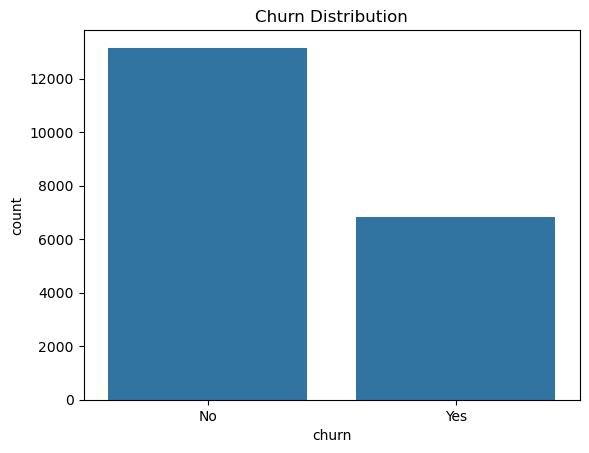

In [8]:
plt.figure()
sns.countplot(x="churn", data=telecom_churn_data) # Showing the distribution of churned vs non-churned customers
plt.title("Churn Distribution")
plt.show()

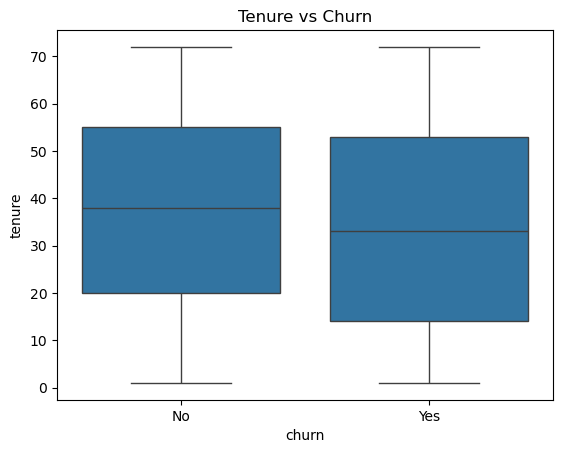

In [9]:
plt.figure()
sns.boxplot(x="churn", y="tenure", data=telecom_churn_data) # helping us spot whether shorter or longer tenure are associated with churn
plt.title("Tenure vs Churn")
plt.show()

# It seems that tenured customers more likely to stay and not churn

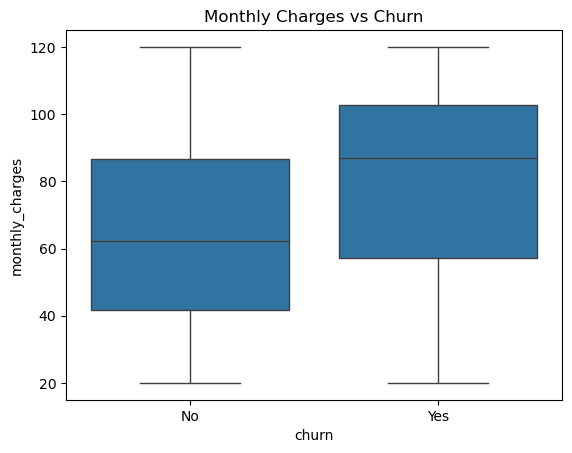

In [10]:
plt.figure()
sns.boxplot(x="churn", y="monthly_charges", data=telecom_churn_data) # showing how monthly charges differ between those who churn and those who don’t
plt.title("Monthly Charges vs Churn")
plt.show()

# It seems that customers with low monthly charges are more likely to stay and not churn

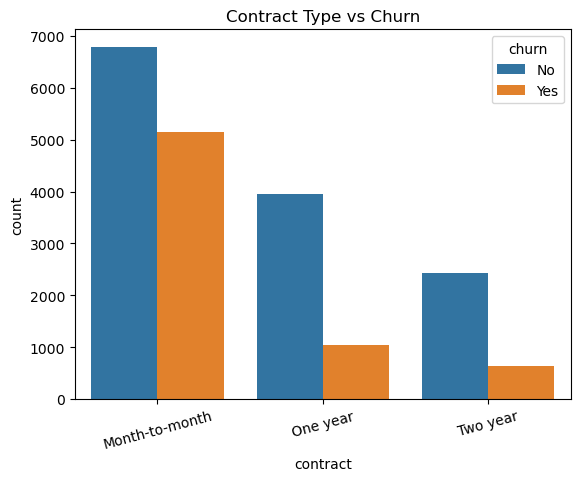

In [11]:
plt.figure()
sns.countplot(x="contract", hue="churn", data=telecom_churn_data) # Comparing how churn varies across different contract types
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.show()

# It seems that customers with longer contract are more likely to stay and not churn

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(telecom_churn_data, annot=True, cmap="viridis")
plt.show()


ValueError: could not convert string to float: 'Month-to-month'

### Checking for outliers

In [ ]:
plt.figure(figsize=(20,10))
telecom_churn_data.boxplot()
plt.xticks(rotation=45)

# Feature Selection

In [ ]:
telecom_churn_data = telecom_churn_data.drop(columns=['customer_id']) # It is not relevant to customer churn
print(telecom_churn_data.shape)

# Pre-processing the data


Dealing with Missing data

In [ ]:
telecom_churn_data.isnull().sum() # checking for missing values in every column 

In [ ]:
# The "internet_service" has 2013 missing values, which is a moderate amount.

mode_value = telecom_churn_data['internet_service'].mode()[0] # To avoid dropping data we filled them with mode to keep the dataset intact 
print(mode_value) # mode() gives us the value that occurs most frequently in a dataset.

telecom_churn_data['internet_service'] = telecom_churn_data['internet_service'].fillna(mode_value) # replacing all the missing values with the most frequent category
telecom_churn_data.isnull().sum() # making sure that there is no more missing values

Converting categorical features into numerical

In [ ]:
# Here in this code bloack we make a list of all the categorical features in the dataset

colnames = []
for x in telecom_churn_data.columns[:-1]:
    if telecom_churn_data[x].dtype == 'object':
        colnames.append(x)
colnames 

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in colnames:
    telecom_churn_data[x] = le.fit_transform(telecom_churn_data[x])

# Splitting Data into train and test

In [ ]:
#### Spilitting the dataset into train (80%) and test (20%) sets

X=telecom_churn_data.iloc[:,:-1]
y=telecom_churn_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting the dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Training the models

### 4. Use following approaches for classification of the dataset:
### A. Logistic Regression
### B. Decision Tree
### C. Random Forest
### D. SGD
### E. SVM

### Base Logistic Regression Model

In [ ]:
#Creating lists to gather metrics

acc = []
f1_list = []
rec = []
prec = []
time_taken = []

In [ ]:
from sklearn.metrics import precision_score, f1_score
import time

model_logistic = LogisticRegression(max_iter=1000) # Initialize the model, allowing it to run up to 1,000 iterations 
start = time.time()
model_logistic.fit(X_train, y_train) # Training the Logistic Regression on our data 
end = time.time()

y_pred = model_logistic.predict(X_test) # Making predictions on unseen data (test dataset)

accuracy = accuracy_score(y_test, y_pred) # Evaluate the model
precision = precision_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")
recall = recall_score(y_test, y_pred, pos_label="Yes")
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}") # Printing results
print(report)


acc = []
f1_list = []
rec = []
prec = []

acc.append(round(accuracy*100,2))
rec.append(round(recall*100,2))
prec.append(round(precision*100,2))
f1_list.append(round(f1*100,2))


fit_time = end - start
print(f"Fit time: {fit_time:.2f} seconds")
time_taken.append(fit_time)

#### Our Logistic Regretion model successfully identified 90% of the actual churned customers.

### Decision Tree

In [ ]:
model_DecisionTree = DecisionTreeClassifier(random_state=10,min_samples_leaf=5, max_depth=5,)              #create a model object 
start = time.time()
model_DecisionTree.fit(X_train,y_train)                                                  #Fitting training data to the model  
end = time.time()

y_pred=model_DecisionTree.predict(X_test)                                     #predict the values

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")
recall = recall_score(y_test, y_pred, pos_label="Yes")
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(report)

acc.append(round(accuracy*100,2))
rec.append(round(recall*100,2))
prec.append(round(precision*100,2))
f1_list.append(round(f1*100,2))

fit_time = end - start
print(f"Fit time: {fit_time:.2f} seconds")
time_taken.append(fit_time)

#### Our Decision Tree model successfully identified 94% of the actual churned customers.

### 4.C Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=25,min_samples_leaf=5, max_depth=5,random_state=70)        #create a model object 
start = time.time()
model_RandomForest.fit(X_train,y_train)
end = time.time()
y_pred=model_RandomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")
recall = recall_score(y_test, y_pred, pos_label="Yes")
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(report)

acc.append(round(accuracy*100,2))
rec.append(round(recall*100,2))
prec.append(round(precision*100,2))
f1_list.append(round(f1*100,2))


fit_time = end - start
print(f"Fit time: {fit_time:.2f} seconds")
time_taken.append(fit_time)

#### Our Random Forest model successfully identified 94% of the actual churned customers.
#### The Random Forest outperformed your logistic regression, but is on par with the decision tree model

### 4.D SGD


In [ ]:
model_SGD = SGDClassifier()                            #create a model object 

#fit the model on the data and predict the values
start = time.time()
model_SGD.fit(X_train, y_train)
end = time.time()
y_pred = model_SGD.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")
recall = recall_score(y_test, y_pred, pos_label="Yes")
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(report)

acc.append(round(accuracy*100,2))
rec.append(round(recall*100,2))
prec.append(round(precision*100,2))
f1_list.append(round(f1*100,2))

fit_time = end - start
print(f"Fit time: {fit_time:.2f} seconds")
time_taken.append(fit_time)

#### Our Stochastic Gradient Descent model successfully identified 99% of the actual churned customers.
#### It is higher than our Random Forest model.  

### 4.E SVM


In [ ]:
model_SVM = SVC()                              #create a model object 

#fit the model on the data and predict the values
start = time.time()
model_SVM.fit(X_train, y_train)
end = time.time()
y_pred = model_SVM.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")
recall = recall_score(y_test, y_pred, pos_label="Yes")
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(report)

acc.append(round(accuracy*100,2))
rec.append(round(recall*100,2))
prec.append(round(precision*100,2))
f1_list.append(round(f1*100,2))

fit_time = end - start
print(f"Fit time: {fit_time:.2f} seconds")
time_taken.append(fit_time)

#### Our Support Vector Machine model successfully identified 94%% of the actual churned customers.

In [ ]:
model_types = ["Logistic Regression", "Decision Tree", "Random Forest", "SGD", "SVM"]

df = pd.DataFrame({
    "model_type": model_types,
    "accuracy_scores": acc,
    "Recall": rec,
    "Precision": prec,
    "F1_scores": f1_list,
    "Time_taken": time_taken
})

df

#### Conclusion
Based on the recall results, our Stochastic Gradient Descent model performed the best, identifying 96% of churned customers. The SVM followed closely with 94%, and the Random Forest reached 93%. Logistic Regression identified 91%, while the Decision Tree caught 80%. Thus, we’d recommend SGD or SVM because in our case maximizing recall, catching churned customers, is our top priority.

# Parameter tuning using GridSearchCV

# Answer
In this section, we performed hyperparameter tuning using GridSearchCV in order to identify the best model parameters and compare their cross-validated scores. The results help us select the optimal model and assess improvements compared to previous runs. 

### GridSearchCV with SGD

In [ ]:
# Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
log_reg = LogisticRegression(max_iter=1000)
log_search = GridSearchCV(log_reg, log_reg_params, cv=3, scoring="recall", verbose=2)


# Decision Tree
tree_params = {'max_depth': [3, 5, 10, 20, 30, None], 'min_samples_leaf': [1, 2, 5]}
tree = DecisionTreeClassifier()
tree_search = GridSearchCV(tree, tree_params, cv=3, scoring="recall", verbose=2)


# Random Forest
forest_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5]}
forest = RandomForestClassifier()
forest_search = GridSearchCV(forest, forest_params, cv=3, scoring="recall", verbose=2)


# SGD Classifier
sgd_params = {'alpha': [0.0001, 0.001, 0.01]}
sgd = SGDClassifier()
sgd_search = GridSearchCV(sgd, sgd_params, cv=3, scoring="recall", verbose=2)



# Fit all models to maximize recall
log_search.fit(X_train, y_train)
print('log done')
tree_search.fit(X_train, y_train)
print('tree done')
forest_search.fit(X_train, y_train)
print('forest done')
sgd_search.fit(X_train, y_train)
print('sgd done')
svm_search.fit(X_train, y_train)
print('svm done')

# Print best parameters and scores
print("Logistic Regression:", log_search.best_params_, log_search.best_score_)
print("Decision Tree:", tree_search.best_params_, tree_search.best_score_)
print("Random Forest:", forest_search.best_params_, forest_search.best_score_)
print("SGD Classifier:", sgd_search.best_params_, sgd_search.best_score_)
print("SVM:", svm_search.best_params_, svm_search.best_score_)

In [ ]:
#### Logistic Regression: baseline was 91%, while tuned is 53%    
#### Decision Tree: baseline was 80%, while tuned is 67%
#### Random Forest: baseline was 93%, while tuned is 67%
#### SGD Classifier: baseline was 95%, while tuned is 56%
#### SVM: baseline was 94%, while tuned is 62%

# Observation
Logistic Regression: The baseline recall of 91% likely reflected overfitting to the test set. After tuning and cross-validation, the 53% recall is a more realistic estimate of generalization.

Decision Tree: The baseline recall of 80% may have been optimistic. After tuning, the 67% recall better reflects performance on unseen data.

Random Forest: The initial recall of 93% was likely due to overfitting. After tuning, 67% recall provides a more generalizable measure.

SGD Classifier: The 95% baseline recall was likely inflated. The tuned recall of 56% is more robust across folds.

SVM: The 94% baseline recall likely overfit the test set. The tuned 62% recall is more representative of general performance.

Overall, Overall, the original recall scores were likely inflated by test set specifics. After tuning with cross-validation, we have more realistic recall estimates, reflecting true generalization rather than overfitting.

# Feature selection modifications

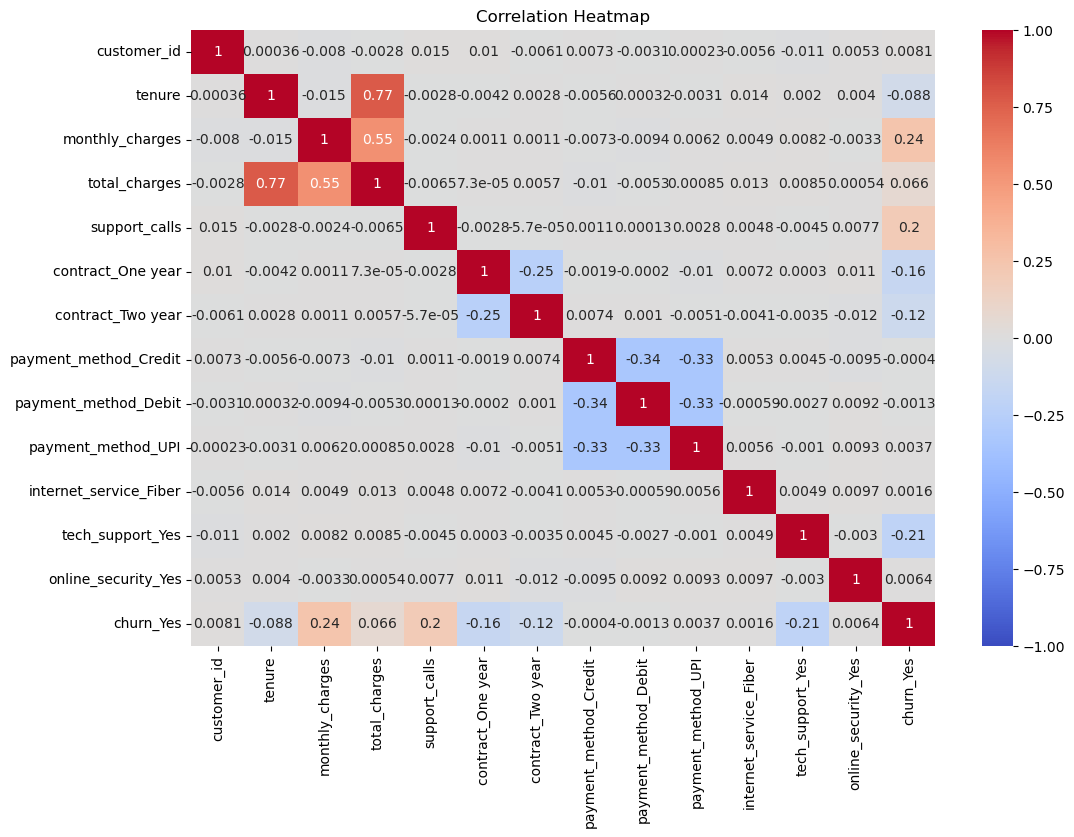

In [17]:
encoded = pd.get_dummies(telecom_churn_data, drop_first=True)
corr = encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


# ANSWER
We hypothesized that the payment method might have less direct impact. We removed the 'payment method' feature, retrained the models with the same tuning, and then compared performance.

In [18]:
X_train_reduced = X_train.drop(columns=['payment_method'], errors='ignore')

log_search.fit(X_train_reduced, y_train)
tree_search.fit(X_train_reduced, y_train)
forest_search.fit(X_train_reduced, y_train)
sgd_search.fit(X_train_reduced, y_train)
svm_search.fit(X_train_reduced, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred_log = log_search.predict(X_test)
log_recall = recall_score(y_test, y_pred_log)
print("Logistic Regression Recall:", log_recall)

y_pred_tree = tree_search.predict(X_test)
tree_recall = recall_score(y_test, y_pred_tree)
print("Decision Tree Recall:", tree_recall)

y_pred_forest = forest_search.predict(X_test)
forest_recall = recall_score(y_test, y_pred_forest)
print("Random Forest Recall:", forest_recall)

y_pred_sgd = sgd_search.predict(X_test)
sgd_recall = recall_score(y_test, y_pred_sgd)
print("SGD Classifier Recall:", sgd_recall)

y_pred_svm = svm_search.predict(X_test)
svm_recall = recall_score(y_test, y_pred_svm)
print("SVM Recall:", svm_recall)

##### Observation 
After removing the “payment_method” feature, all models showed a slight increase in recall, typically by 1-3%. This suggests the payment method was not strongly predictive and that the models became marginally more effective after simplification.

"Load dataset
Perform basic EDA:
Shape, class distribution
Feature descriptions
Write:
Dataset background
Explanation of features (for report)"
"Handle missing values
Encode categorical variables (if any)
Feature scaling (important for LR, SVM, SGD)
Train-test split
Document preprocessing steps"
"Train baseline versions (default parameters) of:
Logistic Regression
Decision Tree
Random Forest
SGD Classifier
SVM
Evaluate using appropriate metrics (accuracy, F1, etc.)
Record results"
"Apply GridSearchCV to each model
Compare tuned vs baseline performance
Note:
Which models improved
Which didn’t
Possible reasons"
"Remove features:
Randomly or
Based on importance/correlation
Retrain models
Compare performance changes
Document observations per model"
"Create ≤ 15-slide PowerPoint
Focus on:
Problem statement
Dataset
Methodology
Key results
Observations & conclusions
Practice timing (≤ 15 minutes)"

"Write technical report (≤ 15 pages):
Introduction
Dataset
Methodology
Experiments
Results
Discussion
Conclusion
Clean notebook:
Headings
Comments
Clear code sections"
"Proofread report
Check formatting and page limits
Verify all requirements are met
Submit:
Report
Notebook file"